In [1]:
from Layer import Layer
from NeuralNetwork import NeuralNetwork

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import one_hot_encode
from genieclust.plots import plot_scatter

def load_data_classification(path, plot=False):
    raw = pd.read_csv(path)
    set_ = raw.loc[:, ["x", "y"]]
    labels_ = raw.cls
    if plot:
        plot_scatter(set_, labels_)
    return np.array(set_), np.array(labels_).reshape(-1, 1)

In [2]:
n = 100
X_train, y_train = load_data_classification("MGU_projekt1/Classification/data.circles.train.%d.csv" % n)
X_test, y_test = load_data_classification("MGU_projekt1/Classification/data.circles.test.%d.csv" % n)

df = pd.read_csv("MGU_projekt1/Classification/data.circles.train.%d.csv" % n)
df_test = pd.read_csv("MGU_projekt1/Classification/data.circles.test.%d.csv" % n)

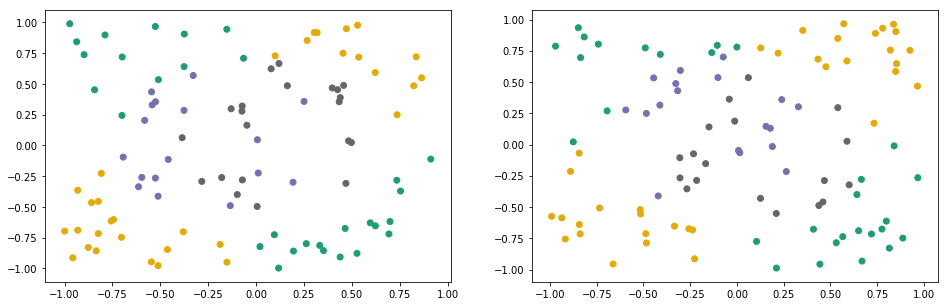

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
plt.show()

In [89]:
np.random.seed(1234)
# nn = NeuralNetwork("cross_entropy", 0)
# nn.add(Layer(20, 2, "sigmoid"))
# nn.add(Layer(30, 20, "sigmoid"))
# nn.add(Layer(3, 30, "softmax"))


# nn = NeuralNetwork("cross_entropy", 0)
# nn.add(Layer(2, 2, "sigmoid"))

nn = NeuralNetwork("cross_entropy", 0)
nn.add(Layer(8, 2, "relu"))
nn.add(Layer(16, 8, "relu"))
nn.add(Layer(32, 16, "sigmoid"))
nn.add(Layer(64, 32, "relu"))
nn.add(Layer(32, 64, "relu"))
nn.add(Layer(16, 32, "sigmoid"))
nn.add(Layer(4, 16, "softmax"))

In [90]:
loss, test_loss, grad_norm = nn.train(
    X_train, one_hot_encode(y_train, 4),
    X_test, one_hot_encode(y_test, 4),
    epochs=100,
    learning_rate=1e-1
)

99

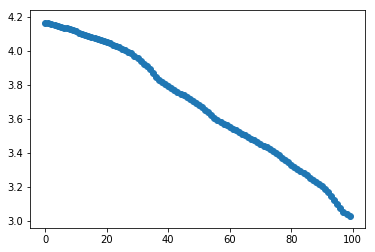

In [91]:
plt.scatter(np.arange(len(loss)), loss)
plt.show()

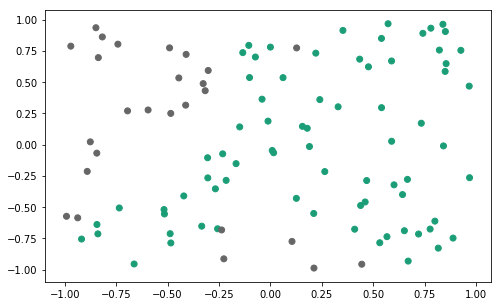

In [92]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=nn.forward_pass(X_test).argmax(axis=-1), cmap='Dark2')
plt.show()